In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [57]:

# Combine Voyage Prive files
voyageprive_files = glob.glob("../data/voyageprive_hotels_*.csv")
voyageprive_data = pd.concat([pd.read_csv(file) for file in voyageprive_files], ignore_index=True)

# Combine Verychic files
verychic_files = glob.glob("../data/verychic_hotels_*.csv")
verychic_data = pd.concat([pd.read_csv(file) for file in verychic_files], ignore_index=True)


In [58]:


# Display sample data
voyageprive_data.shape


(932, 6)

In [59]:

verychic_data.shape


(2505, 9)

In [60]:
# Clean Voyage Prive data
voyageprive_data['price'] = voyageprive_data['price'].str.extract(r'(\d+\.?\d*)').astype(float)
voyageprive_data.rename(columns={'Country': 'country', 'hotel_name': 'hotel_name', 
                                  'start_date': 'start_date', 'end_date': 'end_date'}, inplace=True)

# Clean Verychic data
verychic_data.rename(columns={'Country': 'country', 'hotel_name': 'hotel_name', 
                               'start_date': 'start_date', 'end_date': 'end_date', 'Price': 'price'}, inplace=True)

# Convert dates to datetime
voyageprive_data['start_date'] = pd.to_datetime(voyageprive_data['start_date'])
voyageprive_data['end_date'] = pd.to_datetime(voyageprive_data['end_date'])
verychic_data['start_date'] = pd.to_datetime(verychic_data['start_date'])
verychic_data['end_date'] = pd.to_datetime(verychic_data['end_date'])


In [61]:
def process_dataframe(df):
    """
    Preprocess the 'hotel_name' column in the dataframe to standardize names by:
    - Converting to lowercase
    - Replacing accented characters with unaccented equivalents
    - Removing spaces, special characters, and digits
    - Removing common keywords like 'hotel'

    Parameters:
        df (pd.DataFrame): Dataframe with a 'hotel_name' column to preprocess.

    Returns:
        pd.DataFrame: Dataframe with the preprocessed 'hotel_name' column.
    """
    df['hotel_name_original'] = df['hotel_name']
    df['hotel_name'] = (
        df['hotel_name']
        .str.lower()
        .str.replace('ô', 'o')
        .str.replace('é', 'e')
        .str.replace('è', 'e')
        .str.replace('hotel', '')
        .str.replace('1', '')
        .str.replace('2', '')
        .str.replace('3', '')
        .str.replace('4', '')
        .str.replace('5', '')
        .str.replace('6', '')
        .str.replace('7', '')
        .str.replace('8', '')
        .str.replace('9', '')
        .str.replace('[^a-zA-Z0-9]', '', regex=True)  # Remove all special characters
    )

    # round dates to seconds to avoid floating point errors
    df['start_date'] = pd.to_datetime(df['start_date']).dt.round('s')
    df['end_date'] = pd.to_datetime(df['end_date']).dt.round('s')
    return df

In [62]:
voyageprive_cleaned = process_dataframe(voyageprive_data)
verychic_cleaned = process_dataframe(verychic_data)

In [63]:
# Find overlaps
overlapping_deals = pd.merge(voyageprive_cleaned, verychic_cleaned, on='hotel_name', suffixes=('_vp', '_vc'))
overlapping_deals = overlapping_deals[
    (overlapping_deals['start_date_vp'] <= overlapping_deals['end_date_vc']) &
    (overlapping_deals['end_date_vp'] >= overlapping_deals['start_date_vc'])
]

print(f"Number of overlapping deals: {len(overlapping_deals)}")


Number of overlapping deals: 30


In [31]:
overlapping_deals

,country_vp,hotel_name,price_vp,time_remaining,start_date_vp,end_date_vp,hotel_name_original_vp,City,country_vc,Category,price_vc,Discount,start_date_vc,end_date_vc,Dernière Minute,hotel_name_original_vc
1,CANARY ISLANDS / LANZAROTE,arrecifegranspa,55.0,6 days remaining,2025-01-10 14:17:26,2025-01-16 14:17:26,Arrecife Gran Hotel & Spa 5*,Lanzarote,Îles Canaries,5*,347.00,NaN,2024-12-31 00:05:00,2025-01-10 23:55:00,NaN,Arrecife Gran Hotel & SPA *****
2,ITALY / VENICE,unasalaveneziaadultsonly,50.0,6 days remaining,2025-01-10 14:17:26,2025-01-16 14:17:26,UnaHotels Ala Venezia - Adults Only,Venise,Italie,Other,94.00,41.0,2025-01-09 00:05:00,2025-01-18 23:55:00,NaN,UNAHOTELS Ala Venezia - Adults Only
5,ITALY / VENICE,unasalaveneziaadultsonly,50.0,6 days remaining,2025-01-10 14:17:26,2025-01-16 14:17:26,UnaHotels Ala Venezia - Adults Only,Venise,Italie,Other,135.00,40.0,2025-01-09 00:05:00,2025-01-18 23:55:00,NaN,UNAHOTELS Ala Venezia - Adults Only
11,ITALY / ROME,radissoncollectionromaantica,66.0,2 days remaining,2025-01-10 14:17:26,2025-01-12 14:17:26,Radisson Collection Roma Antica 5*,Rome,Italie,5*,275.00,40.0,2025-01-09 00:05:00,2025-01-11 23:55:00,NaN,"Radisson Collection Hotel, Roma Antica *****"
12,ITALY / ROME,radissoncollectionromaantica,66.0,2 days remaining,2025-01-10 14:17:26,2025-01-12 14:17:26,Radisson Collection Roma Antica 5*,Rome,Italie,5*,275.00,40.0,2025-01-12 00:05:00,2025-01-22 23:55:00,NaN,"Radisson Collection Hotel, Roma Antica *****"
13,ITALY / ROME,radissoncollectionromaantica,66.0,2 days remaining,2025-01-10 14:17:26,2025-01-12 14:17:26,Radisson Collection Roma Antica 5*,Rome,Italie,5*,275.00,40.0,2025-01-12 00:05:00,2025-01-22 23:55:00,NaN,"Radisson Collection Hotel, Roma Antica *****"
14,ITALY / ROME,radissoncollectionromaantica,66.0,2 days remaining,2025-01-10 14:17:26,2025-01-12 14:17:26,Radisson Collection Roma Antica 5*,Rome,Italie,5*,275.00,40.0,2025-01-12 00:05:00,2025-01-22 23:55:00,NaN,"Radisson Collection Hotel, Roma Antica *****"
15,ITALY / ROME,radissoncollectionromaantica,66.0,2 days remaining,2025-01-10 14:17:26,2025-01-12 14:17:26,Radisson Collection Roma Antica 5*,Rome,Italie,5*,275.00,40.0,2025-01-12 00:05:00,2025-01-22 23:55:00,NaN,"Radisson Collection Hotel, Roma Antica *****"
20,FRANCE / VERSAILLES,lelouisversailleschteaumgallery,NaN,1 day remaining,2025-01-10 14:17:26,2025-01-11 14:17:26,Hotel Le Louis Versailles Château MGallery 4*,Versailles,France,4*,147.00,48.0,2024-12-12 00:05:00,2025-01-12 23:55:00,NaN,Hôtel Le Louis Versailles Château MGallery ****
27,UNITED ARAB EMIRATES / DUBAI,sheratonjumeirahbeachresort,220.0,4 days remaining,2025-01-19 14:30:36,2025-01-23 14:30:36,Sheraton Jumeirah Beach Resort 5*,Dubaï,Émirats arabes unis,5*,169.98,42.0,2025-01-19 00:05:00,2025-01-25 23:55:00,NaN,Sheraton Jumeirah Beach Resort *****


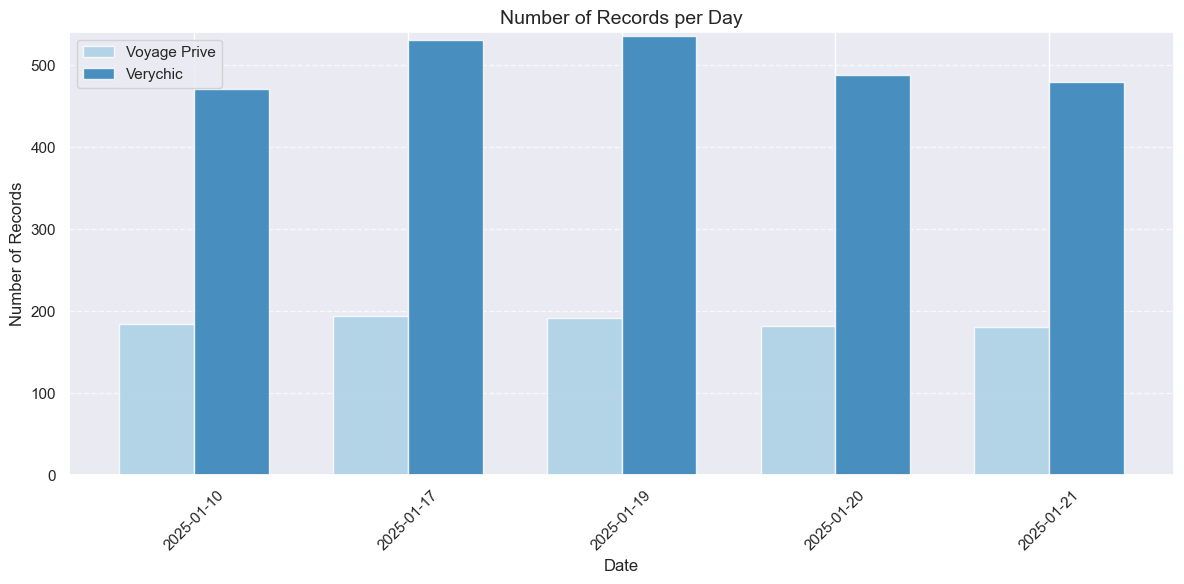

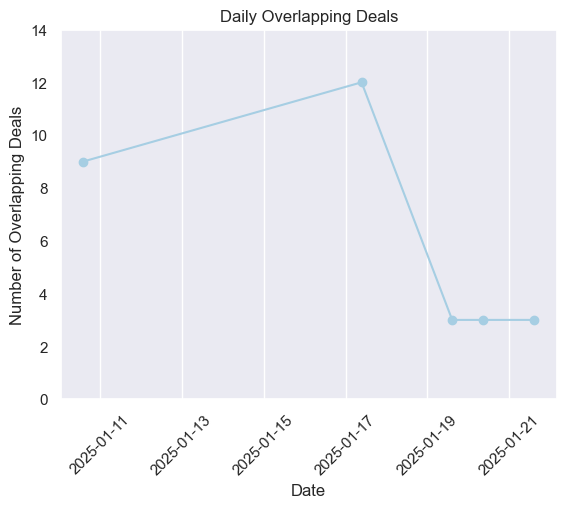

In [70]:

# Count overlaps per day
daily_overlaps = overlapping_deals['start_date_vp'].value_counts().sort_index()

# Plot
import matplotlib.pyplot as plt

plt.plot(daily_overlaps.index, daily_overlaps.values, marker='o')
plt.title('Daily Overlapping Deals')
plt.xlabel('Date')
plt.ylabel('Number of Overlapping Deals')
plt.ylim(0, 14)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

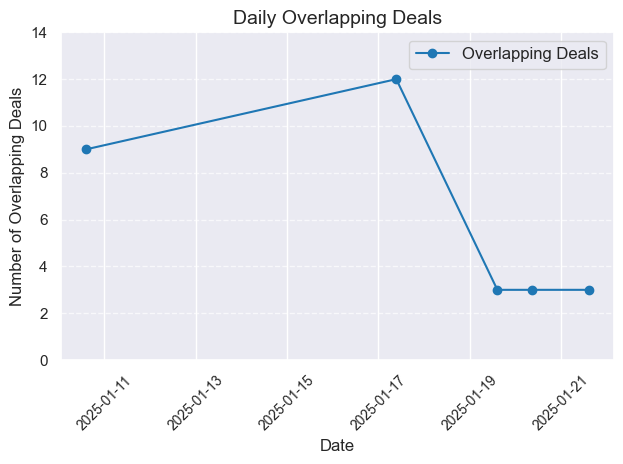

In [73]:
# Restyled Plot for Daily Overlapping Deals
# plt.figure(figsize=(8, 3))  # Set figure size

# Plot line with a consistent style
plt.plot(
    daily_overlaps.index, 
    daily_overlaps.values, 
    marker='o', 
    linestyle='-', 
    color='#1f77b4',  # Use a consistent blue color
    label='Overlapping Deals'
)

# Add labels and title
plt.title('Daily Overlapping Deals', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Overlapping Deals', fontsize=12)
plt.ylim(0, 14)  # Match y-axis limit for consistent view

# Add gridlines to match the bar chart style
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Format x-axis ticks
plt.xticks(rotation=45, fontsize=10)

# Add legend for clarity
plt.legend(fontsize=12)

# Ensure layout fits well
plt.tight_layout()

# Display the plot
plt.show()


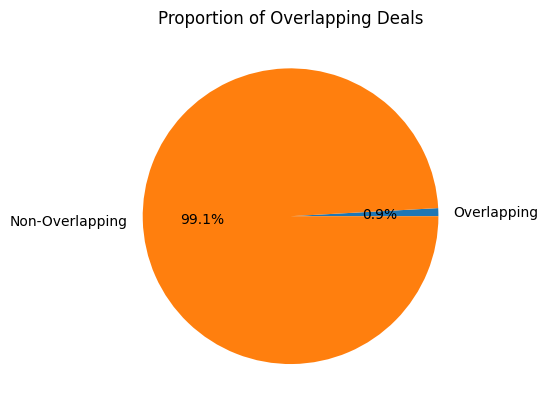

In [ ]:
# Count total and overlapping deals
total_deals = len(voyageprive_data) + len(verychic_data)
overlap_count = len(overlapping_deals)

# Plot
plt.pie([overlap_count, total_deals - overlap_count], labels=['Overlapping', 'Non-Overlapping'], autopct='%1.1f%%')
plt.title('Proportion of Overlapping Deals')
plt.show()


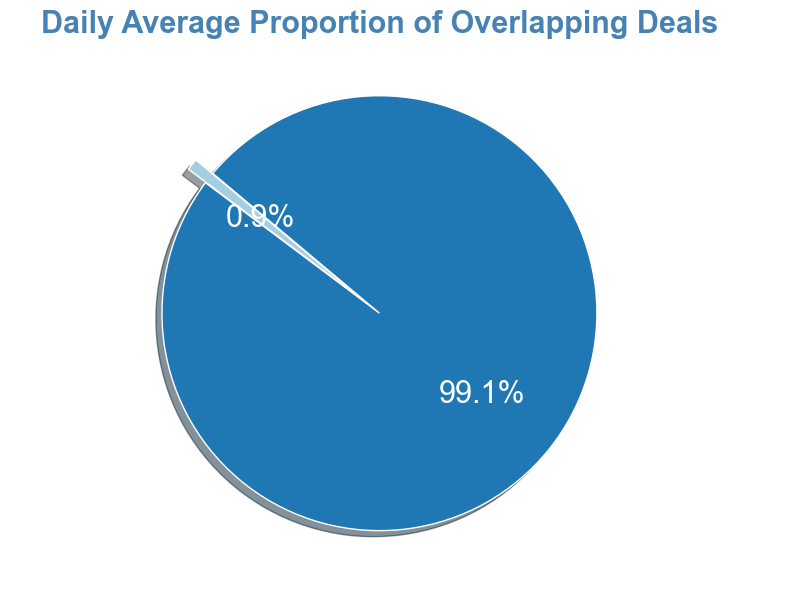

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate data for pie chart
sizes = [overlap_count, total_deals - overlap_count]
labels = ['Overlapping', 'Non-Overlapping']

# Set Seaborn theme
sns.set_theme(style="darkgrid", palette="Paired")

# Plot enhanced pie chart
colors = sns.color_palette("Paired")[:2]  # Use first two colors from Paired palette
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=(0.1, 0),  # Highlight the first slice
    shadow=True,
    textprops={'fontsize': 22, 'color': 'white'}  # Improve text readability
)

# Customize plot
plt.title('Daily Average Proportion of Overlapping Deals', fontsize=22, fontweight='bold', color='steelblue')
plt.tight_layout()

# Show the plot
plt.show()


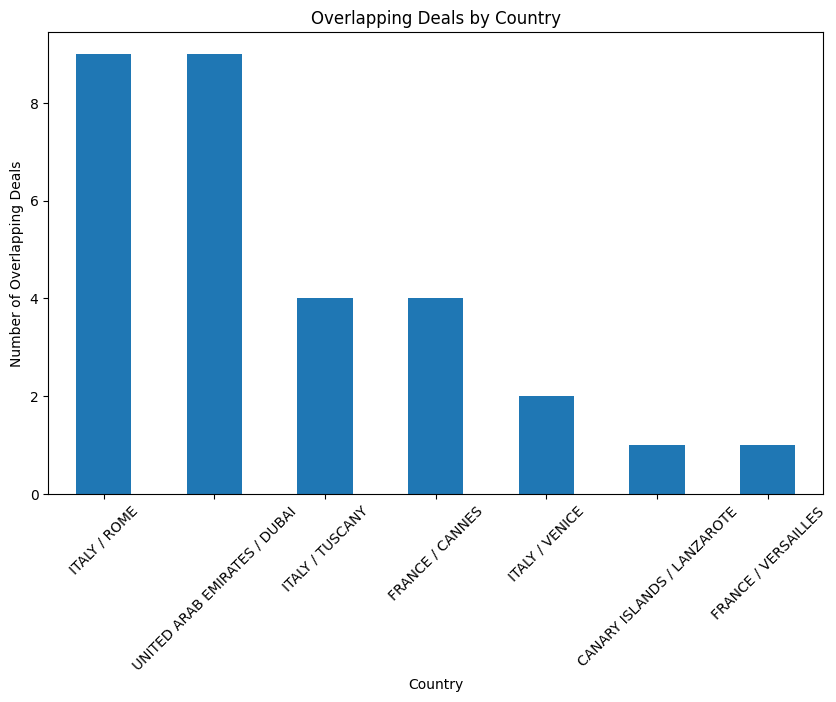

In [38]:
# Group overlapping deals by country
overlap_by_country = overlapping_deals['country_vp'].value_counts()

# Plot
overlap_by_country.plot(kind='bar', figsize=(10, 6))
plt.title('Overlapping Deals by Country')
plt.xlabel('Country')
plt.ylabel('Number of Overlapping Deals')
plt.xticks(rotation=45)
plt.show()



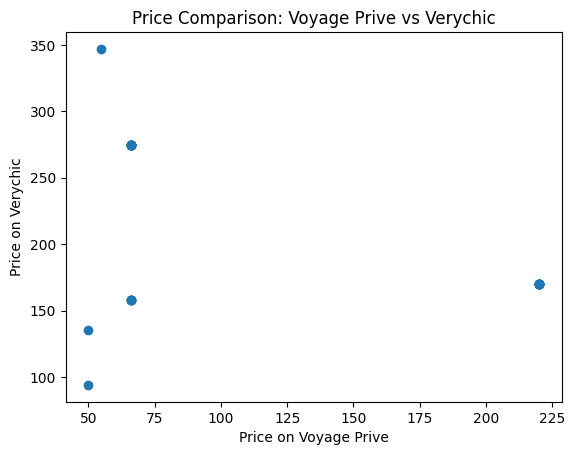

In [39]:
# Plot overlapping deals' price comparison
plt.scatter(overlapping_deals['price_vp'], overlapping_deals['price_vc'])
plt.title('Price Comparison: Voyage Prive vs Verychic')
plt.xlabel('Price on Voyage Prive')
plt.ylabel('Price on Verychic')
plt.show()


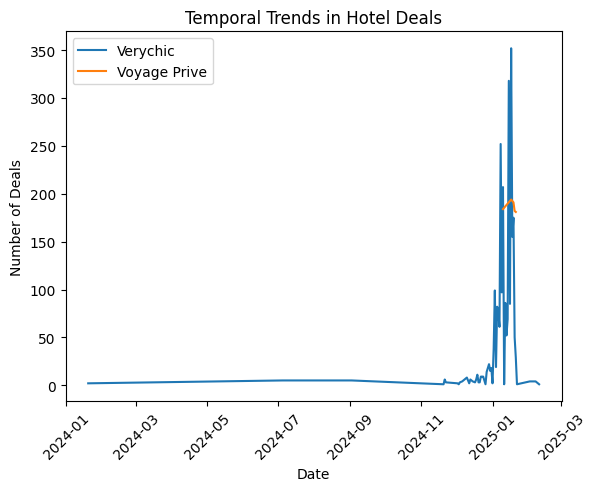

In [41]:
# Count deals by date
voyageprive_trend = voyageprive_data['start_date'].dt.date.value_counts().sort_index()
verychic_trend = verychic_data['start_date'].dt.date.value_counts().sort_index()

# Plot
plt.plot(verychic_trend.index, verychic_trend.values, label='Verychic')

plt.plot(voyageprive_trend.index, voyageprive_trend.values, label='Voyage Prive')
plt.title('Temporal Trends in Hotel Deals')
plt.xlabel('Date')
plt.ylabel('Number of Deals')
plt.legend()
plt.xticks(rotation=45)
plt.show()
